# U.S. Medical Insurance Costs

## Attribute Definitions

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

### Acknowledgements:
The dataset is available on GitHub [here](https://github.com/stedy/Machine-Learning-with-R-datasets).


## Scope Dataset

In [512]:
# import modules

import csv
import import_ipynb
import pandas as pd
import numpy as np

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import RobustScaler

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import export_graphviz
from dtreeviz.trees import dtreeviz
from IPython import display


In [ ]:
with open("insurance.csv") as csvfile:
    insurance_file = csv.reader(csvfile)
    for row in insurance_file:
        print(row)

In [2]:
# load file to Python list
with open("insurance.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    data_dict = list(reader)

no
<class 'list'>


In [3]:
# Print number of entries
print(len(data_dict))

1338


In [4]:
def smoker_mean_age(data_dict):
    """Find mean age of smokers."""
    smoker_count = 0
    smoker_total_age = 0
    nonsmoker_count = 0
    nonsmoker_total_age = 0
    i=0
    for row in data_dict:
        if data_dict[i]['smoker'] == "yes":
            smoker_count += 1
            smoker_total_age += int(data_dict[i]['age'])
        else:
            nonsmoker_count += 1
            nonsmoker_total_age += int(data_dict[i]['age'])
        i += 1
    print("Percent of dataset that are smokers: {}".format( round(smoker_count / (i+1) * 100), ))
    print("Average age of smokers in dataset: {}".format(round(smoker_total_age / (smoker_count))))
    print("Average age of non-smokers in dataset: {}".format(round(nonsmoker_total_age / (nonsmoker_count))))
        
smoker_mean_age(data_dict)

Percent of dataset that are smokers: 20
Average age of smokers in dataset: 39
Average age of non-smokers in dataset: 39


In [5]:
def smoker_average_gender(data_dict):
    """Find percent of smokers that are female vs male."""
    i = 0
    smoker_males = 0
    smoker_females = 0
    for row in data_dict:
        if data_dict[i]['smoker'] == "yes" and data_dict[i]['sex'] == "male":
            smoker_males += 1
        elif data_dict[i]['smoker'] == "yes" and data_dict[i]['sex'] == "female":
            smoker_females += 1
        else:
            pass
        i += 1
    total_smokers = smoker_males + smoker_females
    print("{} percent of smokers are male.".format(round(smoker_males / total_smokers * 100)))
    print("{} percent of smokers are female.".format(round(smoker_females / total_smokers * 100)))
    
smoker_average_gender(data_dict)

58 percent of smokers are male.
42 percent of smokers are female.


In [6]:
def smokers_region(data_dict):
    """Determine what geographic region has highest percentage of smokers."""
    northeast_smokers = 0
    northeast_nonsmokers = 0
    southeast_smokers = 0
    southeast_nonsmokers = 0
    southwest_smokers = 0
    southwest_nonsmokers = 0
    northwest_smokers = 0
    northwest_nonsmokers = 0
    i = 0
    for row in data_dict:
        if data_dict[i]['region'] == 'northeast' and data_dict[i]['smoker'] == "yes":
            northeast_smokers += 1
        elif data_dict[i]['region'] == 'northeast' and data_dict[i]['smoker'] == "no":
            northeast_nonsmokers += 1
        elif data_dict[i]['region'] == 'southeast' and data_dict[i]['smoker'] == "yes":
            southeast_smokers += 1
        elif data_dict[i]['region'] == 'southeast' and data_dict[i]['smoker'] == "no":
            southeast_nonsmokers += 1
        elif data_dict[i]['region'] == 'southwest' and data_dict[i]['smoker'] == "yes":
            southwest_smokers += 1
        elif data_dict[i]['region'] == 'southwest' and data_dict[i]['smoker'] == "no":
            southwest_nonsmokers += 1
        elif data_dict[i]['region'] == 'northwest' and data_dict[i]['smoker'] == "yes":
            northwest_smokers += 1
        elif data_dict[i]['region'] == 'northwest' and data_dict[i]['smoker'] == "no":
            northwest_nonsmokers += 1
        else:
            pass
        i += 1
    northeast_total_people = northeast_smokers + northeast_nonsmokers
    southeast_total_people = southeast_smokers + southeast_nonsmokers
    southwest_total_people = southwest_smokers + southwest_nonsmokers
    northwest_total_people = northwest_smokers + northwest_nonsmokers
    print("{} percent of people in the northeast are smokers.".format(round(northeast_smokers / northeast_total_people * 100)))
    print("{} percent of people in the southeast are smokers.".format(round(southeast_smokers / southeast_total_people * 100)))
    print("{} percent of people in the southwest are smokers.".format(round(southwest_smokers / southwest_total_people * 100)))
    print("{} percent of people in the northwest are smokers.".format(round(northwest_smokers / northwest_total_people * 100)))

    
smokers_region(data_dict)


21 percent of people in the northeast are smokers.
25 percent of people in the southeast are smokers.
18 percent of people in the southwest are smokers.
18 percent of people in the northwest are smokers.


In [7]:
def pcnt_parents_smokers(data_dict):
    """Find percentage of parents that are smokers vs non-parents."""
    parent_smokers = 0
    parent_nonsmokers = 0
    nonparent_smokers = 0
    nonparent_nonsmokers = 0
    i = 0
    for row in data_dict:
        if data_dict[i]['children'] != '0' and data_dict[i]['smoker'] == "yes":
            parent_smokers += 1
        elif data_dict[i]['children'] != '0' and data_dict[i]['smoker'] == "no":
            parent_nonsmokers += 1
        elif data_dict[i]['children'] == '0' and data_dict[i]['smoker'] == "yes":
            nonparent_smokers += 1
        elif data_dict[i]['children'] == '0' and data_dict[i]['smoker'] == "no":
            nonparent_nonsmokers += 1
        else:
            pass
        i += 1
    total_parents = parent_smokers + parent_nonsmokers
    total_nonparents = nonparent_smokers + nonparent_nonsmokers
    print("{} percent of parents are smokers.".format(round(parent_smokers / total_parents * 100)))
    print("{} percent of non-parents are smokers.".format(round(nonparent_smokers / total_nonparents * 100)))

pcnt_parents_smokers(data_dict)

21 percent of parents are smokers.
20 percent of non-parents are smokers.


## Create DataFrame

In [8]:
def import_dataframe(data_dict):
    return pd.DataFrame(data_dict)

df = import_dataframe(data_dict)

In [9]:
print(df.head())

  age     sex     bmi children smoker     region      charges
0  19  female    27.9        0    yes  southwest    16884.924
1  18    male   33.77        1     no  southeast    1725.5523
2  28    male      33        3     no  southeast     4449.462
3  33    male  22.705        0     no  northwest  21984.47061
4  32    male   28.88        0     no  northwest    3866.8552


In [35]:
# Fix datatypes

df2 = df.astype({'age': 'int64', 'sex': 'category', 'bmi': 'float64', 'children': 'int64', 'smoker': 'category', 'region': 'category', 'charges': 'float64'})

In [36]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [97]:
print(df2.describe(include='all'))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Plot up column histograms

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

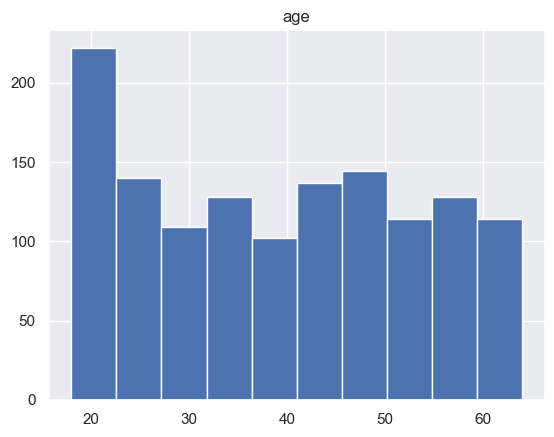

In [90]:
df2.hist('age', bins=10)

Datasets is biased towards youngest age category

array([[<AxesSubplot: title={'center': 'bmi'}>]], dtype=object)

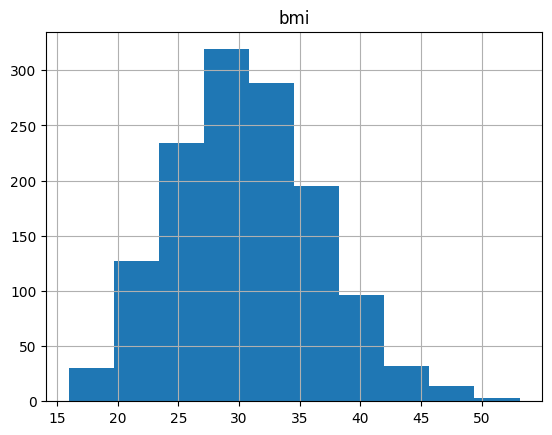

In [31]:
df2.hist('bmi')

array([[<AxesSubplot: title={'center': 'northeast'}>,
        <AxesSubplot: title={'center': 'northwest'}>],
       [<AxesSubplot: title={'center': 'southeast'}>,
        <AxesSubplot: title={'center': 'southwest'}>]], dtype=object)

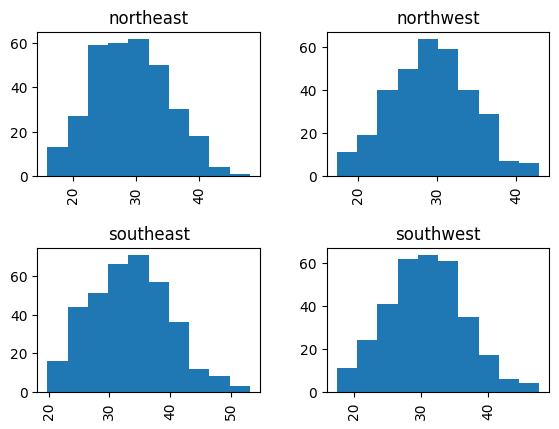

In [40]:
df2.hist(column='bmi', by='region')

array([<AxesSubplot: title={'center': 'no'}>,
       <AxesSubplot: title={'center': 'yes'}>], dtype=object)

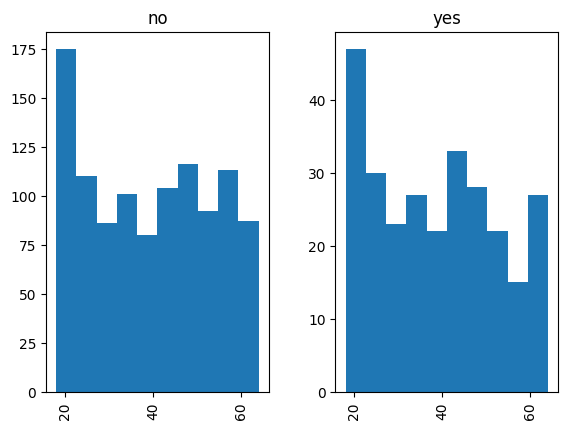

In [41]:
df2.hist(column='age', by='smoker')

array([<AxesSubplot: title={'center': 'female'}>,
       <AxesSubplot: title={'center': 'male'}>], dtype=object)

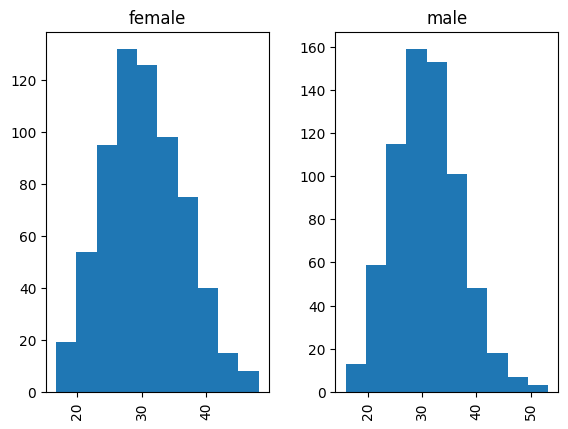

In [42]:
df2.hist(column='bmi', by='sex')

<AxesSubplot: xlabel='smoker'>

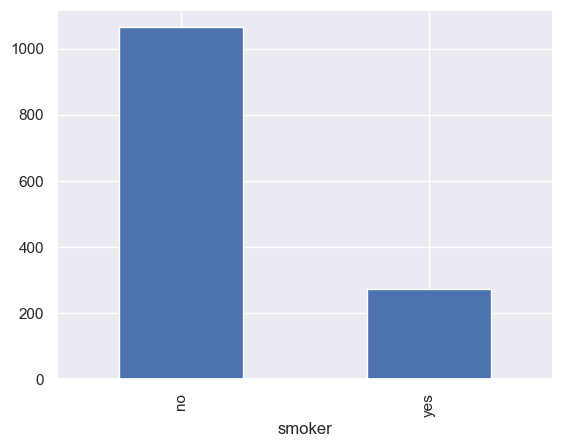

In [62]:
df.groupby('smoker').size().plot(kind='bar')

Dataset biased towards non-smokers

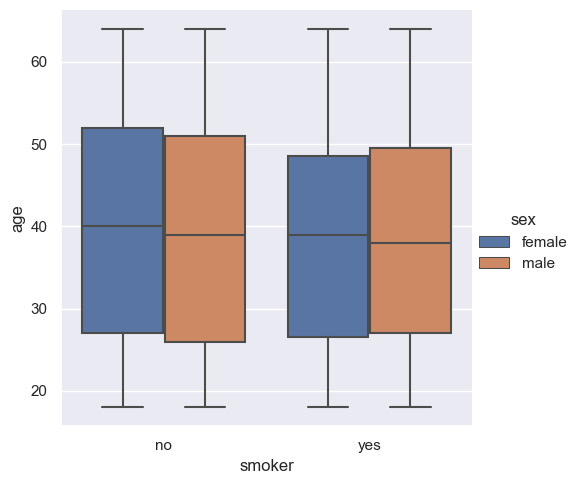

In [82]:
sns.catplot(data=df2, x='smoker', y='age', hue='sex', kind='box')

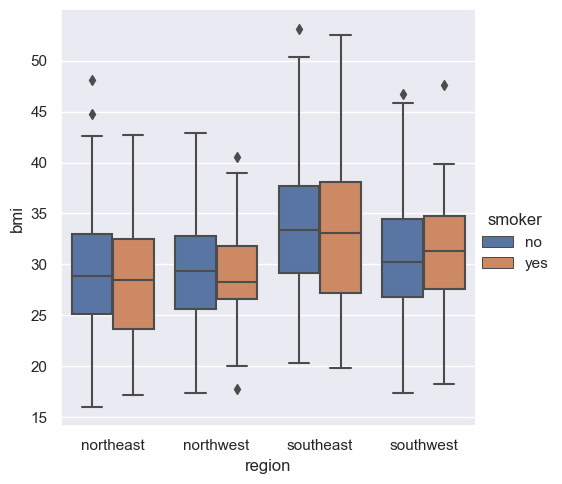

In [81]:
sns.catplot(data=df2, x='region', y='bmi', hue='smoker', kind='box')

Population in the southeast appear to have greater BMI than other populations in the dataset

<AxesSubplot: xlabel='bmi', ylabel='charges'>

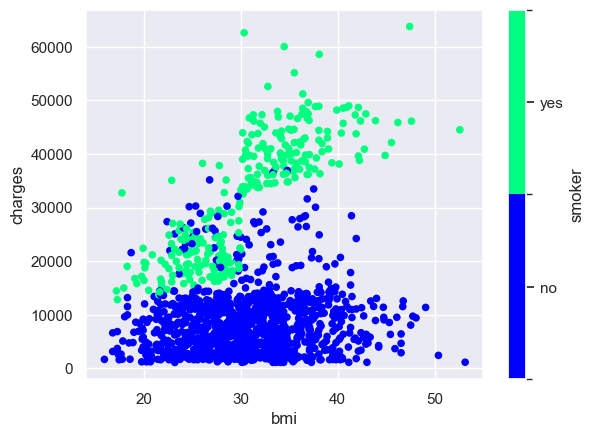

In [76]:
df2.plot.scatter(x='bmi', y='charges', c='smoker', colormap='winter')

For non-smokers, there doesn't appear to be a correlation between BMI and medical costs.  However, for smokers, there is a strong positive relationship.  Interestingly, there appears to be a step-change in cost above a BMI of 30 for smokers.

<AxesSubplot: xlabel='bmi', ylabel='charges'>

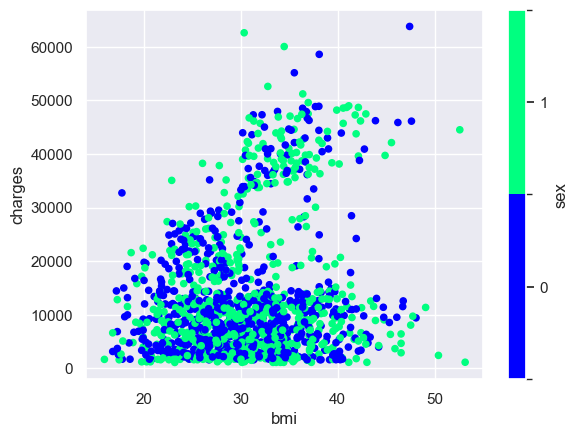

In [436]:
df2.plot.scatter(x='bmi', y='charges', c='sex', colormap='winter')

No differences in medical costs between males and females as a function of BMI

<AxesSubplot: xlabel='age', ylabel='charges'>

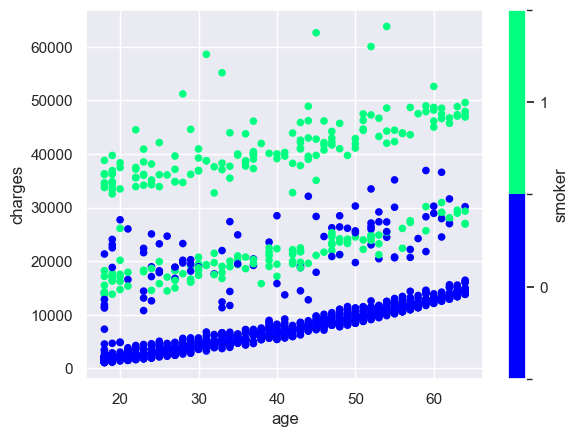

In [447]:
df2.plot.scatter(x='age', y='charges', c='smoker', colormap='winter')

Three distinct age-related trends.  One for non-smokers, one for smokers, and a middle trend. For smokers, this is likely the two trends for high and low BMI seen in the BMI vs cost plot.

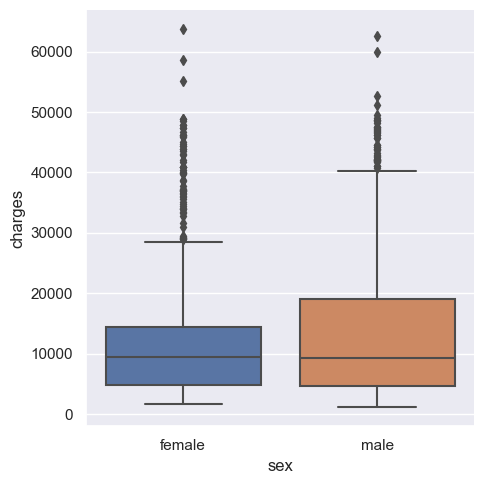

In [80]:
sns.catplot(data=df2, x='sex', y='charges', kind='box')

Median medical costs about the same for males and females, however for males the distribution appears to skew a little higher.

<AxesSubplot: xlabel='children', ylabel='bmi'>

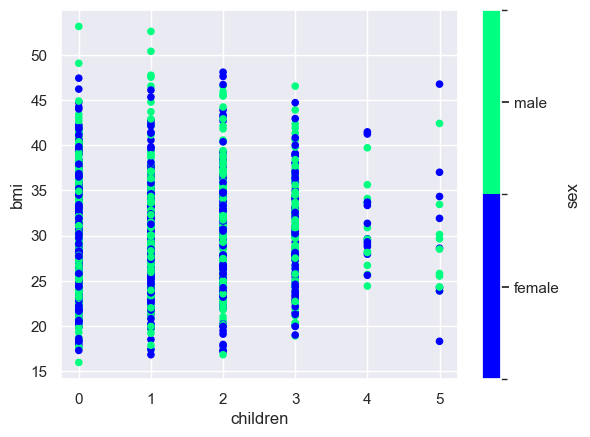

In [86]:
df2.plot.scatter(x='children', y='bmi', c='sex', colormap='winter')

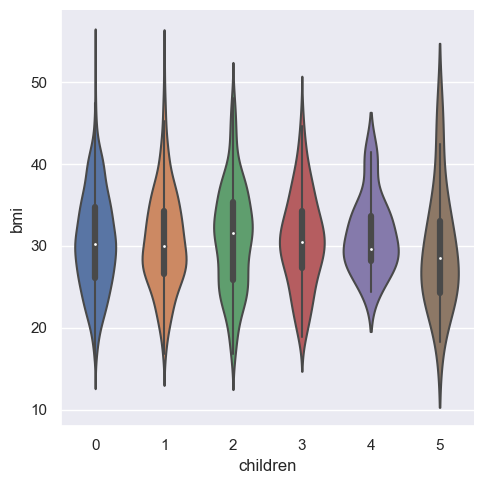

In [87]:
sns.catplot(data=df2, x='children', y='bmi', kind='violin')

<AxesSubplot: xlabel='children', ylabel='charges'>

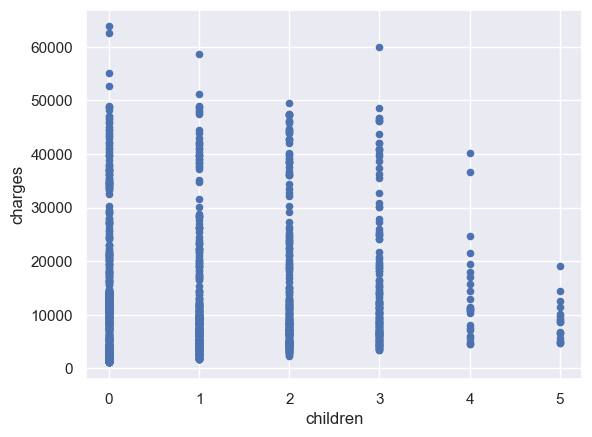

In [93]:
df2.plot.scatter(x='children', y='charges')

array([[<AxesSubplot: title={'center': 'children'}>]], dtype=object)

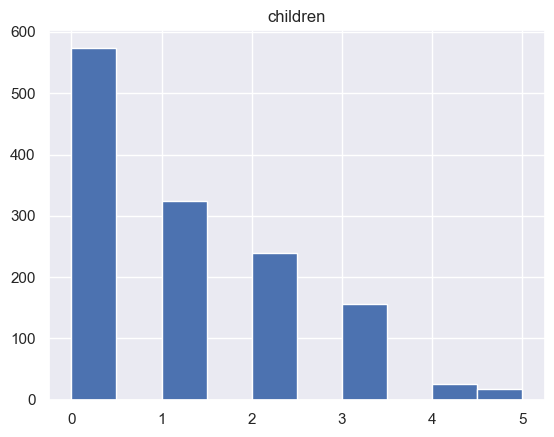

In [94]:
df2.hist('children')

# Predict Medical Costs

In [520]:
# Define training dataset

X_train = df2.iloc[:, [0, 1, 2, 3, 4, 5]]
y_train = df2.iloc[:, 6]

In [521]:
X_train.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4


In [ ]:
#Encode categorical features

sex_mapper = {'female': 0, 'male': 1}
smoker_mapper = {'no': 0, 'yes': 1}
region_mapper = {'northeast': 1, 'southeast': 2, 'southwest': 3, 'northwest': 4}

X_train['sex'].replace(sex_mapper, inplace=True)
X_train['smoker'].replace(smoker_mapper, inplace=True)
X_train['region'].replace(region_mapper, inplace=True)

# set dtype of categorical features to int64 for XGBoost
X_train = X_train.astype({'age': 'int64', 'sex': 'int64', 'bmi': 'float64', 'children': 'int64', 'smoker': 'int64', 'region': 'int64'})

In [523]:
X_train.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4


In [524]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

### Define helper functions

In [525]:
def calculate_accuracy(y_val, y_pred):
    """ 
    Calculate and print accuracty of model prediction.
    """
    print(f"R squared: {np.round(r2_score(y_val, y_pred), decimals=3)}")
    print(f"Mean Squared Error: {np.round(mean_squared_error(y_val, y_pred), decimals=3)}")
    print(f"Median Absolute Error: {np.round(median_absolute_error(y_val, y_pred), decimals=3)}")

def make_crossplots(y_val, y_pred, X_val):
    """
    Generate crossplots of observed vs predicted costs, colored by each feature.
    """
    fig, axs = plt.subplots(2, 3, figsize=(12,8))

    for i, cat in enumerate(['sex', 'smoker', 'region']):
        axs[0,i].scatter(y_val, y_pred, c=X_val[cat].astype('category').cat.codes)
        axs[0,i].set_title(cat)

    for j, ord in enumerate(['age', 'children', 'bmi']):
        axs[1,j].scatter(y_val, y_pred, c=X_val[ord])
        axs[1,j].set_title(ord)

    plt.show()

### 1. Linear Regression

R squared: 0.768
Mean Squared Error: 34044316.636
Median Absolute Error: 2646.574


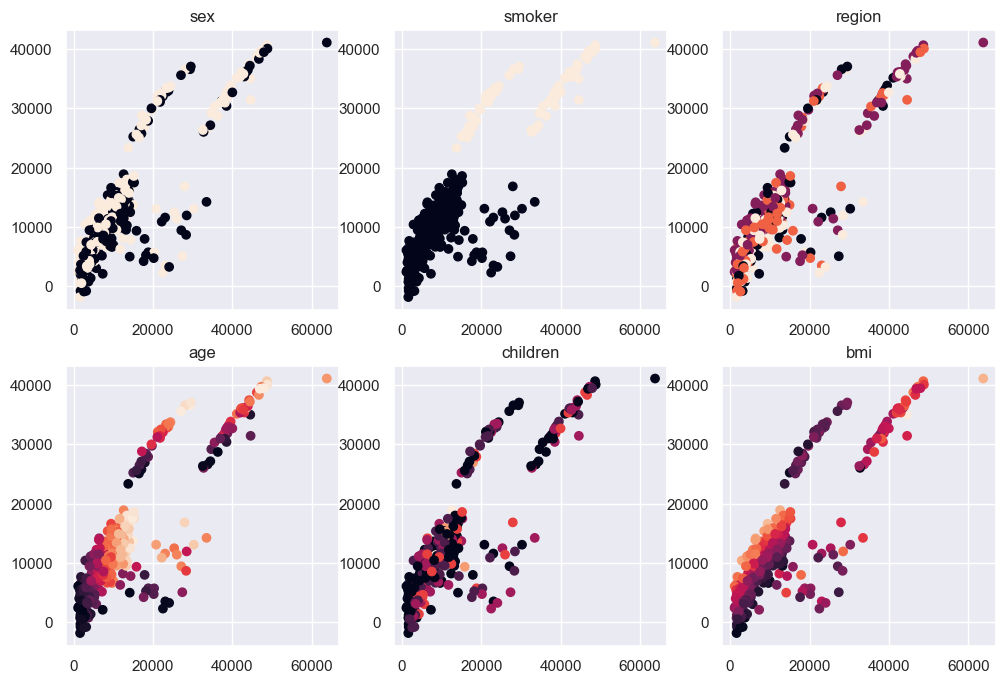

In [526]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict y for validation set
y_pred = model_lr.predict(X_val)

calculate_accuracy(y_val, y_pred)
make_crossplots(y_val, y_pred, X_val)



Linear Regression struggles here because there is a non-linear component to medical costs, as we saw in the BMI vs cost vs smoker status chart.
We need to use a model that can handle non-linear relationships, such as Random Forest or Neural Networks.  There are clear differences for smokers with high bmi's.

### 2. Random Forest

R squared: 0.862
Mean Squared Error: 20205741.491
Median Absolute Error: 686.062


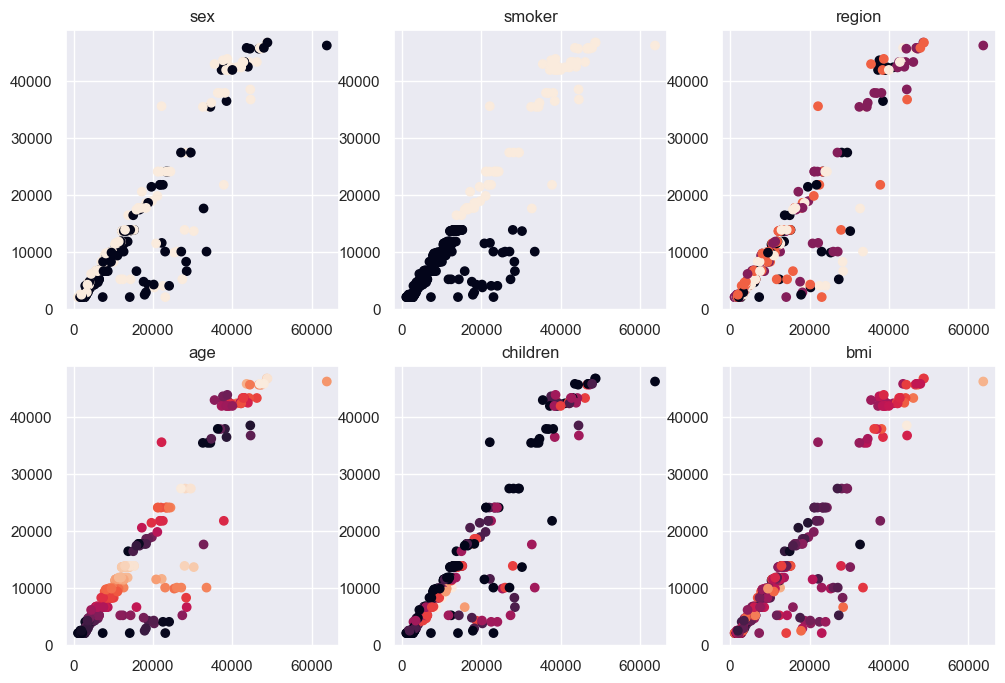

In [541]:
model_rf = RandomForestRegressor(n_estimators=10, criterion='absolute_error', max_depth=4, random_state=1)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_val)

calculate_accuracy(y_val, y_pred)
make_crossplots(y_val, y_pred, X_val)

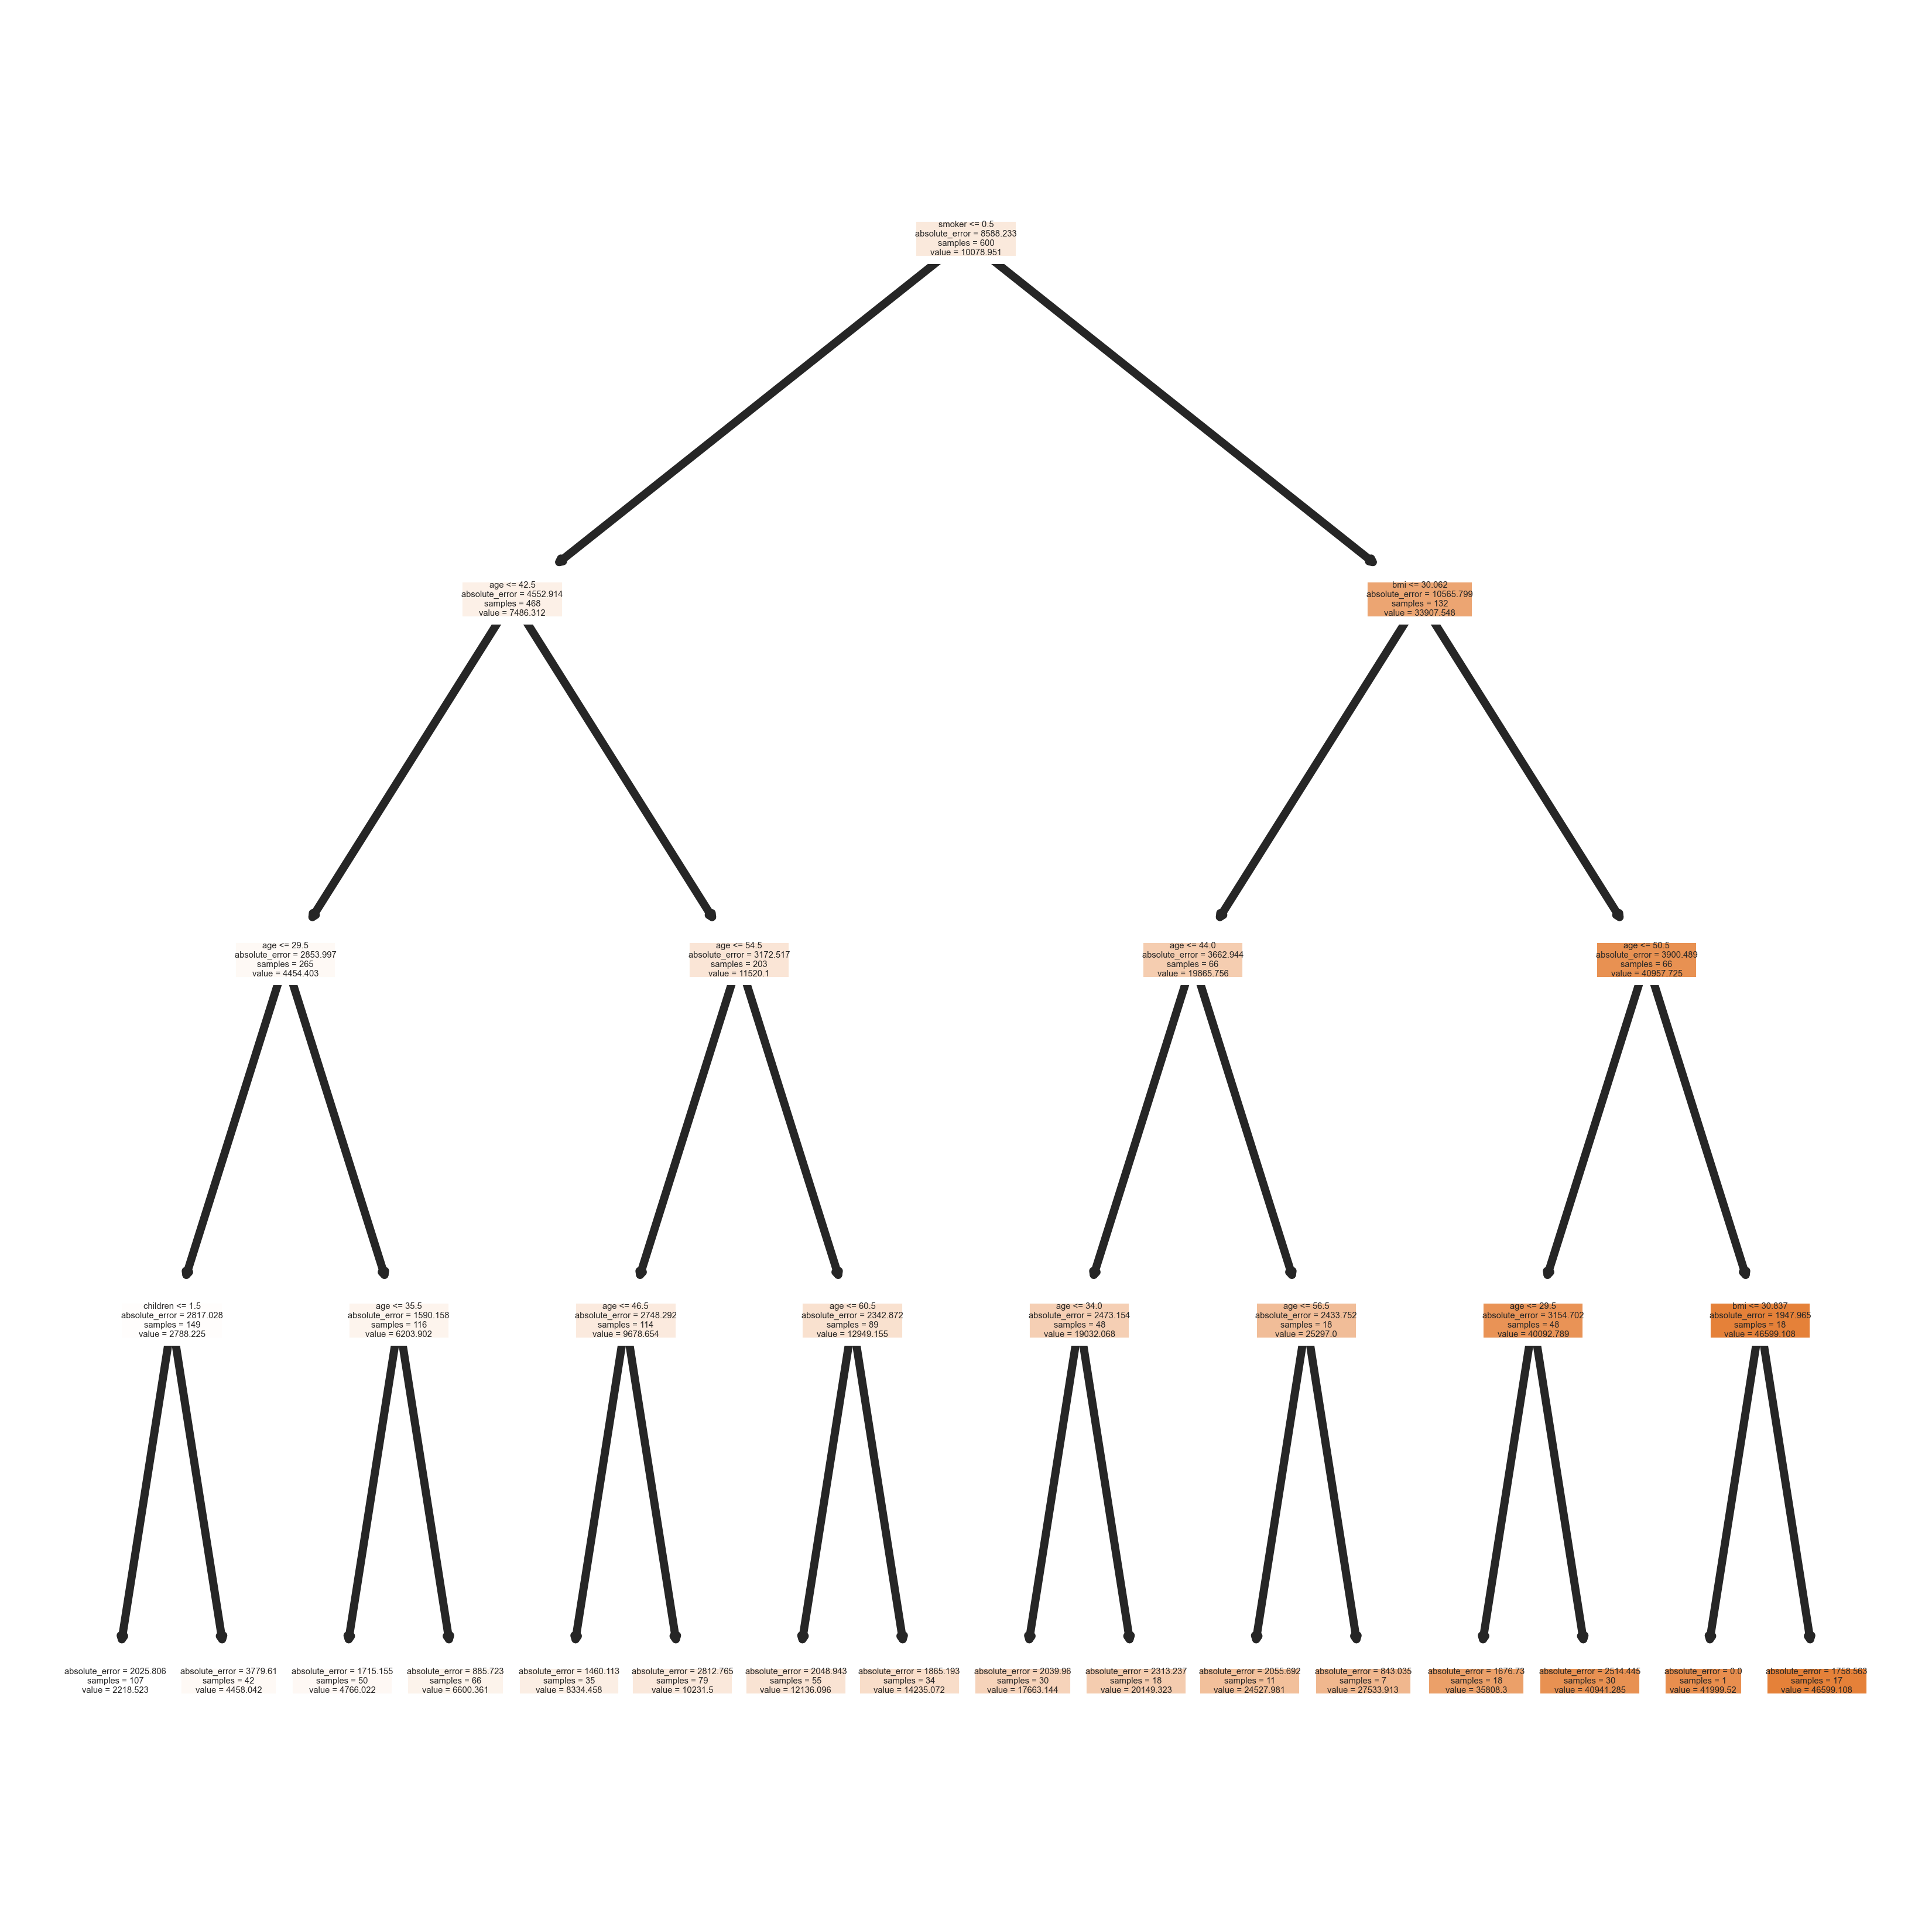

In [542]:
# Plot tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model_rf.estimators_[0],
               feature_names = X_train.columns.tolist(), 
               filled = True);
fig.savefig('rf_individualtree.png')


Random Forest does a good job of predicting charges with an R squared of 0.862, and a median absolute error of $686.  I found that using the absolute error instead of the mean squared error as the criterion yielded a better result, and is more robust to outliers.  The other nice thing about Random Forest is that it is a decision-tree based algorithm, which allows us to audit what features are driving cost for any given individual. Based on one of the decision tree ensembles, it is clear that whether or not the individual is a smoker is the greatest driver in cost. If they are a smoker, then BMI has a large impact on cost.  If they are not a smoker, then age is the biggest driver.

### 3. XGBoost

R squared: 0.851
Mean Squared Error: 21791631.136
Median Absolute Error: 1399.898


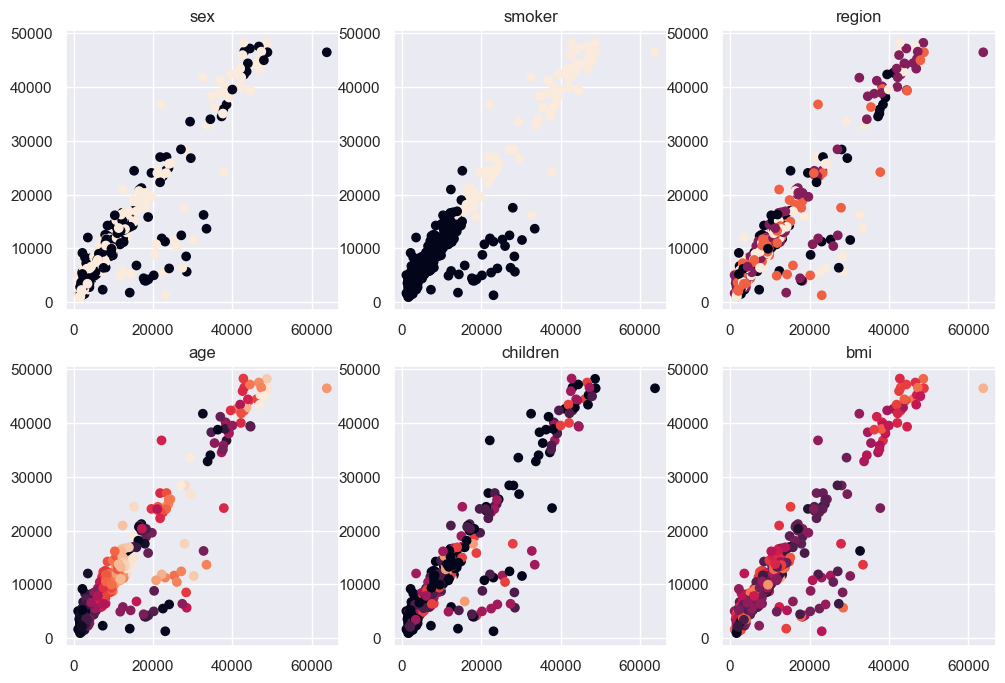

In [544]:
model_xgb = XGBRegressor(n_estimators=100, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_val)

calculate_accuracy(y_val, y_pred)
make_crossplots(y_val, y_pred, X_val)

Similar performance with XGBoost to Random Forest.

### 4. K Nearest Neighbors Regressor

R squared: 0.141
Mean Squared Error: 125991231.228
Median Absolute Error: 5916.309


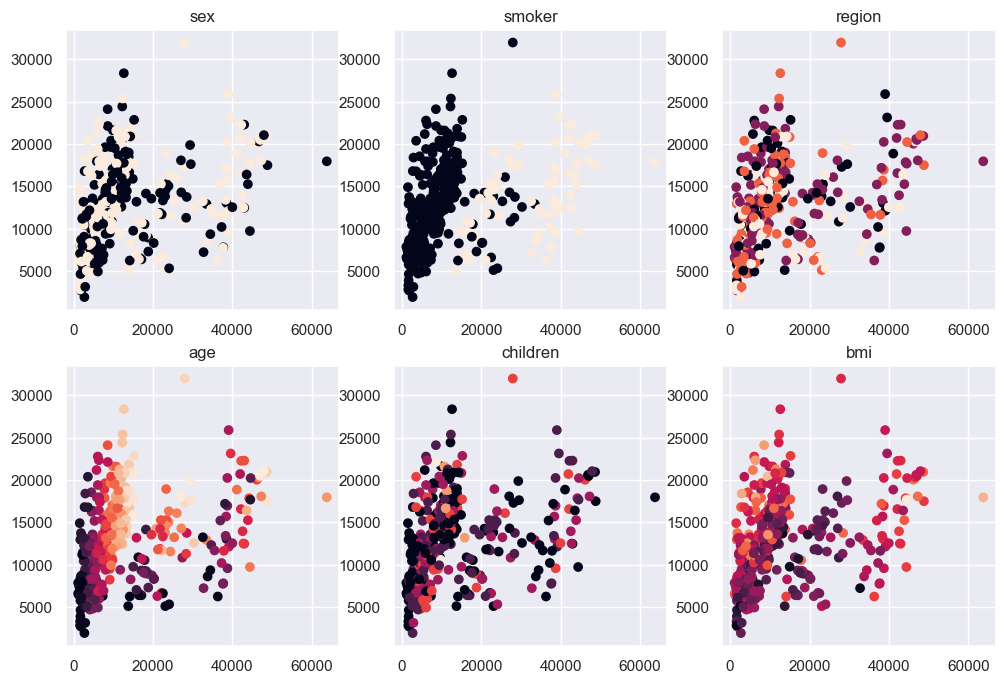

In [499]:
model_knn = KNeighborsRegressor(n_neighbors=10)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_val)

calculate_accuracy(y_val, y_pred)
make_crossplots(y_val, y_pred, X_val)


### 5. Neural Network

In [488]:
# Build neural network

model_nn = Sequential([
    Dense(units=7, kernel_regularizer=l2(0.01), activation='relu'),
    Dense(units=3, kernel_regularizer=l2(0.01), activation='relu'),
    Dense(units=1, activation='linear')
])

In [513]:
# Scale data
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [514]:
# Train neural network

model_nn.compile(optimizer='adam', loss=tf.keras.losses.Huber())
# model_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, verbose=0)
history = model_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=600, verbose=0)

13/13 [==============================] - 0s 1ms/step
R squared: 0.789
Mean Squared Error: 30959272.698
Median Absolute Error: 2316.267


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

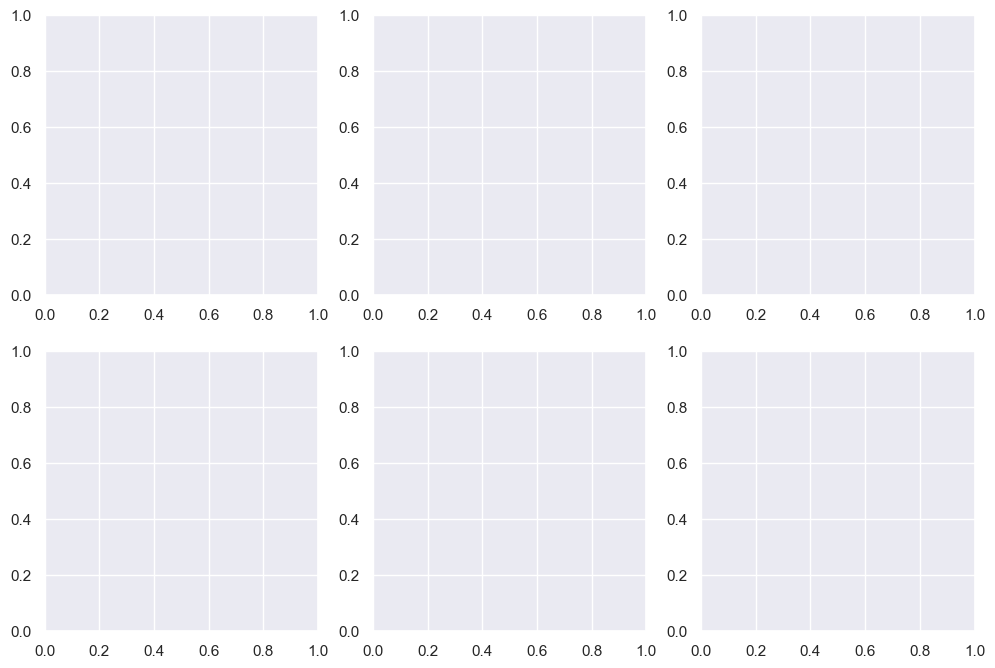

In [516]:
# Make predictions using model
    
y_pred = model_nn.predict(X_val)

calculate_accuracy(y_val, y_pred)
make_crossplots(y_val, y_pred, X_val)


Train: 3045.250, Test: 2664.450


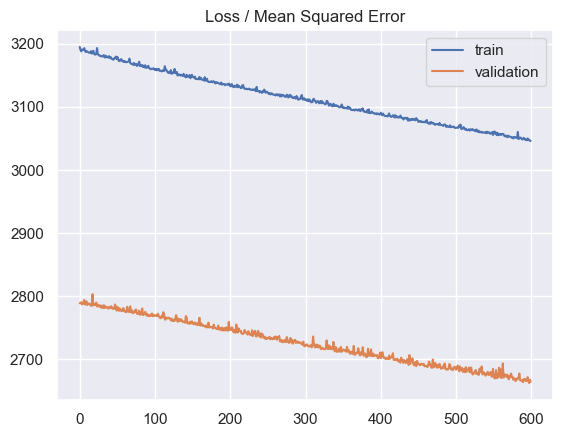

In [511]:
train_mse = model_nn.evaluate(X_train, y_train, verbose=0)
val_mse = model_nn.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, val_mse))

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

K Nearest Neighbor and the Neural Network have some trouble dealing with smokers vs. non-smokers.